### 拟合线性函数

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import SGD

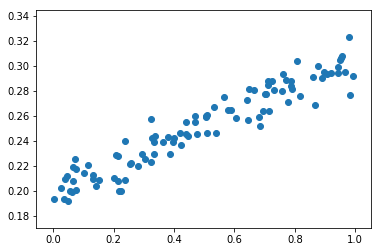

In [2]:
#生成100个0-1的随机点
x_data=np.random.rand(100)
#生成一些随机扰动
noise=np.random.normal(0,0.01,x_data.shape)
#构建目标值，符合线性分布
y_data=x_data*0.1+0.2+noise
#画散点图
plt.scatter(x_data,y_data)
plt.show()

cost： 0.026560917496681213
cost： 0.0004084658285137266
cost： 0.00010501506039872766
cost： 0.0001005946469376795
cost： 0.00010053024743683636


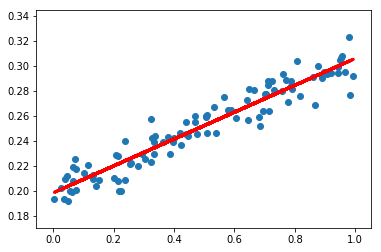

In [3]:
#构建一个顺序模型
#顺序模型为keras中的基本模型结构
model=tf.keras.Sequential()
#在模型中添加一个全连接层
model.add(tf.keras.layers.Dense(units=1,input_dim=1))
#设置模型的优化器和代价函数，学习率为0.03
#SGD为随机梯度下降法
#mse:均方误差
model.compile(optimizer=SGD(0.03),loss='mse')

#训练2001个批次
for step in range(2001):
    #训练一个批次数据，返回cost值
    cost=model.train_on_batch(x_data,y_data)
    #每500个batch打印一次cost值
    if step%500==0:
        print('cost：',cost)
#使用predict对数据进行预测，得到预测值y_pred
y_pred=model.predict(x_data)

#显示随机点
plt.scatter(x_data,y_data)
#显示拟合曲线
plt.plot(x_data,y_pred,'r-',lw=3)
plt.show()

### 拟合非线性函数

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD

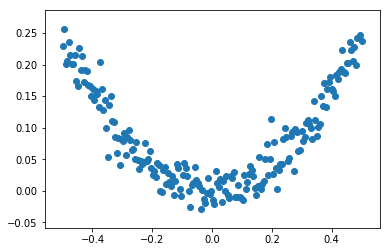

In [22]:
#生成200个均匀分布的点，并新增一个维度(200,1)
x_data=np.linspace(-0.5,0.5,200)[:,np.newaxis]

#生成一些跟x_data相同shape的随机值作为噪声数据
noise=np.random.normal(0,0.02,x_data.shape)

#构建目标值，符合非线性函数
y_data=np.square(x_data)+noise


#画散点图
plt.scatter(x_data[:,0],y_data[:,0])
plt.show()

0.02969394624233246
0.004312104545533657
0.00046432073577307165
0.00042395186028443277


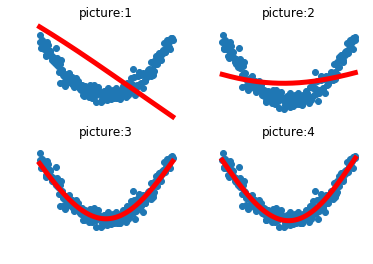

In [27]:
#构建一个顺序模型
model=tf.keras.Sequential()
#因为要做非线性回归，所以需要一个带有隐藏层的神经网络
#并且需要使用非线性的激活函数，比如tanh函数
model.add(tf.keras.layers.Dense(units=10,input_dim=1,activation='tanh'))
model.add(tf.keras.layers.Dense(units=1,activation='tanh'))

#设置模型的优化器和代价函数，学习率为0.3 
model.compile(optimizer=SGD(0.3),loss='mse')

#训练3001个批次
for step in range(3001):
    #训练一个批次数据，返回cost值
    cost=model.train_on_batch(x_data,y_data)
    #每1000个batch打印一次cost值
    if step%1000==0:
        print(cost)
        # 定义一个2*2的图，第三个参数是当前参数，当前是i/1000+1个图
        plt.subplot(2,2,step/1000+1)
        #预测值
        prediction_value=model.predict(x_data)
        #画散点图
        plt.scatter(x_data,y_data)
        #画模型预测曲线图
        plt.plot(x_data,prediction_value,'r-',lw=5)
        #不显示坐标
        plt.axis('off')
        #图片的标题设置
        plt.title('picture:'+str(int(step/1000+1)))
plt.show()

### 手写数字图片分类任务

In [28]:
import tensorflow as tf

In [64]:

#载入数据集
mnist=tf.keras.datasets.mnist
#载入数据，数据载入的时候就已经划分好了训练集和测试集
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#对数据进行归一化处理，有助于提升模型训练的速度，除以255是因为灰度图片像素在0-255
x_train,x_test=x_train/255.0,x_test/255.0
#把训练集和测试集的标签转换为独热编码
y_train=tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=10)
#创建dataset对象，使用dataset对象来管理数据
mnist_train=tf.data.Dataset.from_tensor_slices((x_train,y_train))
#训练周期设置为1
mnist_train=mnist_train.repeat(1)
#批次大小设置为32（每次训练模型传入32个数据进行训练）
mnist_train=mnist_train.batch(32)

#创建dataset对象
mnist_test=tf.data.Dataset.from_tensor_slices((x_test,y_test))
#训练周期设置为1 
mnist_test=mnist_test.repeat(1)
#批次大小设置为32
mnist_test=mnist_test.batch(32)

#模型定义
#先用Flatten把数据从3维变为2维
model=tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                  tf.keras.layers.Dense(10,activation='softmax')])
                
#优化器定义
optimizer = tf.keras.optimizers.SGD(0.1)
#计算平均值
train_loss=tf.keras.metrics.Mean(name='train_loss')
#训练准确率计算
train_accuracy=tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

#计算平均值
test_loss=tf.keras.metrics.Mean(name='test_loss')
#训练准确率计算
test_accuracy=tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

#定义一个训练模型的函数
#装饰器，将python代码转换成tensorflow的图表示代码
@tf.function
def train_step(data, label):
    # 固定写法，使用 tf.GradientTape()来计算梯度
    with tf.GradientTape() as tape:
    # 传入数据获得模型预测结果
        predictions = model(data)
        # 对比 label 和 predictions 计算 loss
        loss = tf.keras.losses.MSE(label, predictions)
        # 传入 loss 和模型参数，计算权值调整
        gradients = tape.gradient(loss, model.trainable_variables)
        # 进行权值调整
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        # 计算平均 loss
        train_loss(loss)
        # 计算平均准确率
        train_accuracy(label, predictions)

#定义一个模型测试的函数
@tf.function
def test_step(data,label):
    predictions=model(data)
    t_loss=tf.keras.losses.MSE(label,predictions)
    test_loss(t_loss)
    test_accuracy(label,predictions)
#训练十个周期
EPOCHS=10
for epoch in range(EPOCHS):
    # 训练集循环 60000/32=1875 次
    for image, label in mnist_train:
    # 每次循环传入一个批次的数据和标签训练模型
        train_step(image, label)
    # 测试集循环 10000/32=312.5->313 次
    for test_image, test_label in mnist_test:
    # 每次循环传入一个批次的数据和标签进行测试
        test_step(test_image, test_label)
    #打印结果
    template='Epoch {}, Train Loss: {:.3},Train Accuracy: {:.3}, Test Loss: {:.3}, Test Accuracy: {:.3}'
    print(template.format(epoch+1,
    train_loss.result(),
    train_accuracy.result(),
    test_loss.result(),
    test_accuracy.result()))

Epoch 1, Train Loss: 0.0169,Train Accuracy: 0.892, Test Loss: 0.0138, Test Accuracy: 0.909
Epoch 2, Train Loss: 0.0149,Train Accuracy: 0.905, Test Loss: 0.0133, Test Accuracy: 0.912
Epoch 3, Train Loss: 0.014,Train Accuracy: 0.911, Test Loss: 0.013, Test Accuracy: 0.915
Epoch 4, Train Loss: 0.0134,Train Accuracy: 0.914, Test Loss: 0.0128, Test Accuracy: 0.916
Epoch 5, Train Loss: 0.013,Train Accuracy: 0.917, Test Loss: 0.0126, Test Accuracy: 0.917
Epoch 6, Train Loss: 0.0127,Train Accuracy: 0.919, Test Loss: 0.0125, Test Accuracy: 0.918
Epoch 7, Train Loss: 0.0124,Train Accuracy: 0.921, Test Loss: 0.0124, Test Accuracy: 0.919
Epoch 8, Train Loss: 0.0122,Train Accuracy: 0.922, Test Loss: 0.0123, Test Accuracy: 0.92
Epoch 9, Train Loss: 0.0121,Train Accuracy: 0.923, Test Loss: 0.0122, Test Accuracy: 0.921
Epoch 10, Train Loss: 0.0119,Train Accuracy: 0.924, Test Loss: 0.0122, Test Accuracy: 0.921
